In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [28]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [29]:
tf.test.is_built_with_cuda()

False

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [31]:
x_train.shape

(50000, 32, 32, 3)

In [32]:
y_train[0:5] # 0 =airplane, 1 = automobile, 2 = bird, 3 = cat, 4 = deer, 5 = dog, 6 = frog, 7 = horse, 8 = ship, 9 = truck 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [33]:
def plt_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

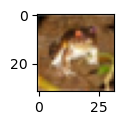

In [34]:
plt_sample(0)

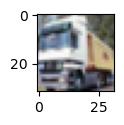

In [35]:
plt_sample(1)

In [36]:
classes = ["airplane", "automabile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

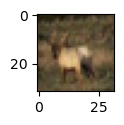

In [37]:
plt_sample(3)

In [38]:
y_train[3]

array([4], dtype=uint8)

In [39]:
classes[y_train[3][0]]

'deer'

In [40]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [41]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [42]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3562 - loss: 1.8088
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4293 - loss: 1.6221 
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4566 - loss: 1.5403
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4785 - loss: 1.4806
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4959 - loss: 1.4321
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5130 - loss: 1.3883
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5268 - loss: 1.3475
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5368 - loss: 1.3165
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.5506 - loss: 1.2832
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5619 - loss: 1.2534 
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5725 - loss: 1.2218
Epoch 

In [44]:
classes[y_test[1][0]]

'ship'

In [46]:
np.argmax(model.predict(x_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


np.int64(8)

In [52]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape= (32,32,3)),
            keras.layers.Dense(3000, activation = 'relu'),
            keras.layers.Dense(1000, activation = 'relu'),
            keras.layers.Dense(10, activation = 'sigmoid')
        ])

    model.compile(optimizer = 'SGD',
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

    return model

In [53]:
with tf.device('CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3555 - loss: 1.8136 
